In [1]:
# importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('smartphones.csv')

## Understanding the Data :

In [3]:
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [4]:
# rows and columns in the data
df.shape

(1020, 11)

In [5]:
# info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [6]:
# missing values
df.isnull().sum()

model          0
price          0
rating       141
sim            0
processor      0
ram            0
battery        0
display        0
camera         1
card           7
os            17
dtype: int64

In [7]:
# duplicate values 
df.duplicated().sum()

0

In [8]:
# statistical info 
df.describe()

,rating
count,879.000000
mean,78.258248
std,7.402854
min,60.000000
25%,74.000000
50%,80.000000
75%,84.000000
max,89.000000


## Data Preprocessing :

In [9]:
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


### 1. Model :

In [10]:
# extracting brand name from the model
df['brand'] = [x[0] for x in df['model'].str.split()]

In [11]:
df.sample(5)

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,brand
740,OPPO Reno 6 Pro Plus 5G,"₹44,990",87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 870, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 65W Fast Charging,"6.55 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP Quad Rear & 32 MP Front Camera,Android v11,No FM Radio,OPPO
157,OPPO F21 Pro 5G,"₹25,969",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.43 inches, 1080 x 2400 px Display with Punch...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card Supported, upto 1 TB",Android v12,OPPO
873,BlackZone Ultra 4G,"₹1,899",NaN,"Dual Sim, 3G, 4G, VoLTE","Single Core, 1 GHz Processor","48 MB RAM, 48 MB inbuilt",2500 mAh Battery,"1.8 inches, 480 x 640 px Display",2 MP Rear Camera,"Memory Card Supported, upto 48 GB",Bluetooth,BlackZone
142,Poco M4 Pro 5G,"₹12,999",76.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Dimensity 810 5G, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.6 inches, 1080 x 2400 px, 90 Hz Display with...",50 MP + 8 MP Dual Rear & 16 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v11,Poco
519,Oppo Reno 8 Pro (8GB RAM + 256GB),"₹42,990",85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 8100-Max, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",4500 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,Android v12,No FM Radio,Oppo


In [12]:
print(len(df.brand.unique()))
df.brand.unique()

56


array(['OnePlus', 'Samsung', 'Motorola', 'Realme', 'Apple', 'Xiaomi',
       'Nothing', 'Oppo', 'Vivo', 'OPPO', 'Poco', 'iQOO', 'Jio', 'Gionee',
       'Tecno', 'Tesla', 'Google', 'Infinix', 'Nokia', 'Cola', 'Letv',
       'POCO', 'iKall', 'LeEco', 'Duoqin', 'Lava', 'Honor', 'Nubia',
       'Redmi', 'Asus', 'itel', 'Royole', 'Sony', 'Oukitel', 'Vertu',
       'BLU', 'Lyf', 'Itel', 'Huawei', 'ZTE', 'Lenovo', 'LG', 'Namotel',
       'Eunity', 'Micromax', 'Zanco', 'Karbonn', 'Leitz', 'CAT', 'DIZO',
       'BlackZone', 'Doogee', 'TCL', 'Sharp', 'Blackview', 'XTouch'],
      dtype=object)

In [13]:
# 'Redmi' and 'Xiaomi' sort of refer to same brand
df[df['brand']=='Redmi']

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,brand
268,Redmi Note 11 Pro 2023,"₹18,999",81.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, IR Blaster","Snapdragon 712, Octa Core, 2.3 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",108 MP Quad Rear & 16 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v11,Redmi
419,Redmi Note 12 Pro Speed Edition,"₹19,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 778G, Octa Core, 2.4 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,Redmi
455,Redmi 12C,"₹7,999",70.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio G85, Octa Core, 2 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery,"6.71 inches, 720 x 1650 px Display with Water ...",50 MP + Depth Sensor Dual Rear & 5 MP Front Ca...,"Memory Card Supported, upto 512 GB",Android v12,Redmi


In [14]:
# fixing 'Poco' and 'Oppo'
df['brand'] = df.brand.str.replace('Poco','POCO').str.replace('Oppo','OPPO').str.replace('Redmi','Xiaomi')

In [15]:
# again
print(len(df.brand.unique()))
df.brand.unique()

53


array(['OnePlus', 'Samsung', 'Motorola', 'Realme', 'Apple', 'Xiaomi',
       'Nothing', 'OPPO', 'Vivo', 'POCO', 'iQOO', 'Jio', 'Gionee',
       'Tecno', 'Tesla', 'Google', 'Infinix', 'Nokia', 'Cola', 'Letv',
       'iKall', 'LeEco', 'Duoqin', 'Lava', 'Honor', 'Nubia', 'Asus',
       'itel', 'Royole', 'Sony', 'Oukitel', 'Vertu', 'BLU', 'Lyf', 'Itel',
       'Huawei', 'ZTE', 'Lenovo', 'LG', 'Namotel', 'Eunity', 'Micromax',
       'Zanco', 'Karbonn', 'Leitz', 'CAT', 'DIZO', 'BlackZone', 'Doogee',
       'TCL', 'Sharp', 'Blackview', 'XTouch'], dtype=object)

brand
Xiaomi       138
Samsung      135
Vivo         111
Realme        97
OPPO          88
Motorola      53
Apple         47
OnePlus       42
POCO          41
Tecno         33
iQOO          32
Nokia         30
Infinix       29
Huawei        16
Google        14
Honor         13
itel          11
Sony           9
Asus           7
Nubia          6
Jio            5
Nothing        5
Lava           4
LG             4
iKall          4
Letv           3
Itel           3
Micromax       3
Eunity         3
Gionee         3
Oukitel        3
Lyf            3
Doogee         2
Lenovo         2
ZTE            2
Royole         2
BLU            1
CAT            1
Blackview      1
Sharp          1
TCL            1
LeEco          1
BlackZone      1
DIZO           1
Leitz          1
Vertu          1
Karbonn        1
Zanco          1
Duoqin         1
Cola           1
Namotel        1
Tesla          1
XTouch         1
Name: count, dtype: int64


<Axes: xlabel='brand'>

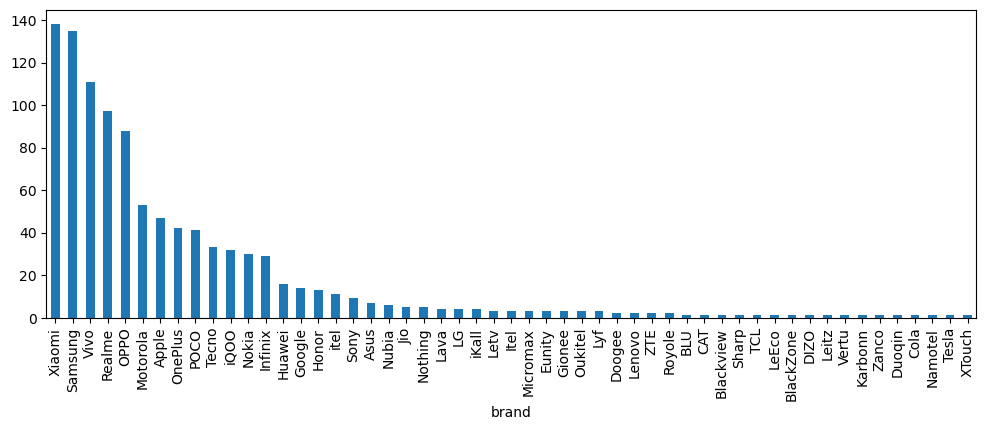

In [16]:
plt.figure(figsize=(12,4))
print(df['brand'].value_counts())
df['brand'].value_counts().plot(kind='bar')

##### Note : After analyzing the price column we can categorize some brands as OTHERS

### 2. Price :

In [17]:
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,brand
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,OnePlus
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,OnePlus
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,Samsung
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,Motorola
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,Realme


In [18]:
df['price'] = df.price.str.replace('₹','').str.replace(',','').astype(np.int64)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   int64  
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
 11  brand      1020 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 95.8+ KB


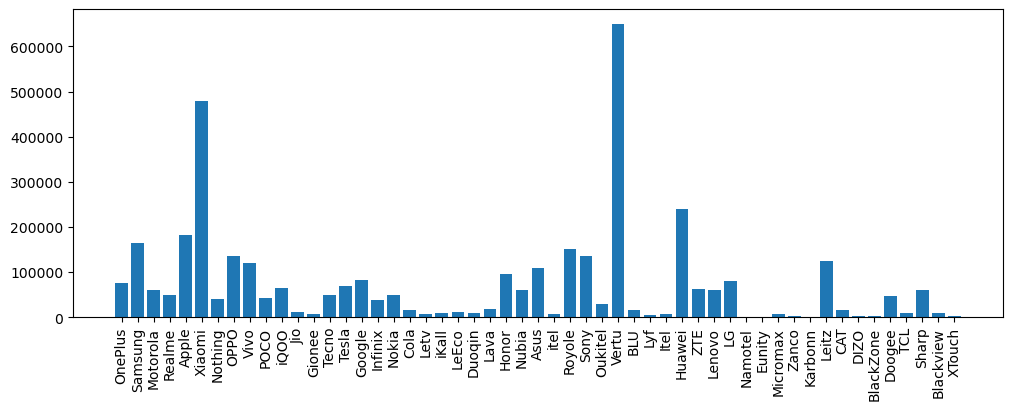

In [20]:
plt.figure(figsize=(12,4))
plt.bar(x=df['brand'],height=df['price'])
plt.xticks(rotation='vertical')
plt.show()

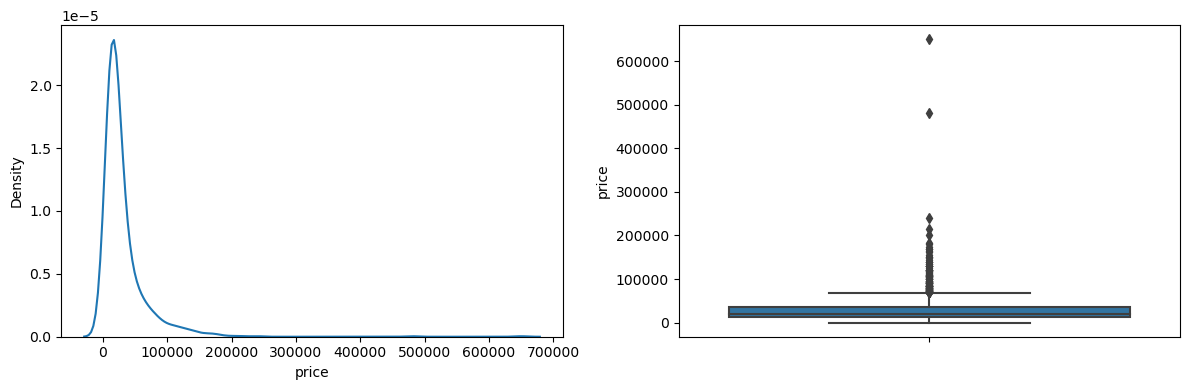

In [21]:
# distribution of price 
plt.figure(figsize=(12,4))

plt.subplot(121)
sns.kdeplot(x=df['price'])

plt.subplot(122)
sns.boxplot(y=df['price'])

plt.tight_layout()

In [22]:
df['price'].describe()

count      1020.000000
mean      31371.767647
std       39168.942590
min          99.000000
25%       12464.250000
50%       19815.000000
75%       34999.000000
max      650000.000000
Name: price, dtype: float64

### 3. Sim :

In [23]:
# temp_1 variable for determining the possible values in the column 
temp_1 = df.sim.str.replace(' ','').str.split(',',expand=True)

In [24]:
for i in range(9):
    print(temp_1[i].unique())
    print(temp_1[i].value_counts())

['DualSim' 'SingleSim' 'Wi-Fi']
0
DualSim      998
SingleSim     21
Wi-Fi          1
Name: count, dtype: int64
['3G' None 'Wi-Fi' '4G']
1
3G       1000
Wi-Fi       1
4G          1
Name: count, dtype: int64
['4G' None 'Wi-Fi' 'VoLTE']
2
4G       998
Wi-Fi      2
VoLTE      1
Name: count, dtype: int64
['5G' 'VoLTE' 'Wi-Fi' None]
3
5G       549
VoLTE    433
Wi-Fi     14
Name: count, dtype: int64
['VoLTE' 'Wi-Fi' None 'NFC']
4
VoLTE    549
Wi-Fi    428
NFC        3
Name: count, dtype: int64
['Wi-Fi' 'Vo5G' None 'NFC' 'IRBlaster']
5
Wi-Fi        537
NFC           55
IRBlaster     46
Vo5G          12
Name: count, dtype: int64
['NFC' None 'IRBlaster' 'Wi-Fi']
6
NFC          327
IRBlaster     59
Wi-Fi         12
Name: count, dtype: int64
[None 'NFC' 'IRBlaster']
7
IRBlaster    53
NFC           8
Name: count, dtype: int64
[None 'IRBlaster']
8
IRBlaster    1
Name: count, dtype: int64


In [25]:
# temp_2 for extracting the req. data from the column
temp_2 = df.sim.str.replace(' ','')

In [26]:
# req. features from the 'Sim' column
df['DualSim'] = [1 if 'DualSim' in word else 0 for word in temp_2] 
df['Volte'] = [1 if 'VoLTE' in word else 0 for word in temp_2]
df['is_5G'] = [1 if '5G' in word else 0 for word in temp_2]
df['is_Vo5G'] = [1 if 'Vo5G' in word else 0 for word in temp_2]
df['wifi'] = [1 if 'Wi-Fi' in word else 0 for word in temp_2]
df['ngc'] = [1 if 'NFC' in word else 0 for word in temp_2]
df['irblaster'] = [1 if 'IRBlaster' in word else 0 for word in temp_2]

### 4. Processor :

In [27]:
df.head(2)

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,brand,DualSim,Volte,is_5G,is_Vo5G,wifi,ngc,irblaster
0,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,OnePlus,1,1,1,0,1,1,0
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,OnePlus,1,1,1,0,1,0,0


##### A. Processor_name

In [28]:
# processor name 
temp_3 = df.processor.str.split(',',expand=True)

In [29]:
# function for replacing more than one elements
def series_replace(series,old,new):
    n=len(old)
    for i in range(n):
        series = series.str.replace(old[i],new[i])
    
    return series

In [37]:
# replacing similar processors
old=['A13','Apple','SC9863A','Spreadtrum','Sanpdragon','SC6531E','Samsung','Qualcomm']
new=['Bionic','Bionic','Unisoc','Unisoc','Snapdragon','Unisoc','Exynos','Snapdragon']
df['processor_name'] = series_replace(temp_3[0].str.split(expand=True)[0],old,new)

In [39]:
df.head(2)

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,brand,DualSim,Volte,is_5G,is_Vo5G,wifi,ngc,irblaster,processor_name
0,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,OnePlus,1,1,1,0,1,1,0,Snapdragon
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,OnePlus,1,1,1,0,1,0,0,Snapdragon


In [59]:
# function for grouping some items of a pandas series
def series_grouping(word):
    if word in items:
        return 'None'
    else:
        return word

In [63]:
# replacing unneccessary items with 'None'
items=['Octa','No','Dual','Quad','1','4','1450','32','800','2000','52','1.77','(28','Single','256','48','8']
df['processor_name'] = df['processor_name'].apply(series_grouping)

##### B. Cores in Processor

In [75]:
# function for calculating number of cores in the processor
def no_of_cores(word):
    if 'Octa' in word:
        return 8
    elif 'Hexa' in word:
        return 6
    elif 'Quad' in word:
        return 4
    elif 'Dual' in word:
        return 2
    else:
        return 'None'

In [85]:
df['processor_cores'] = temp_3[1].fillna('None').apply(no_of_cores)

##### C. Processor_speed

In [94]:
print(temp_3[2].unique())
temp_3[2].isnull().sum()

[' 3.2\u2009GHz Processor' ' 2.2\u2009GHz Processor'
 ' 2.4\u2009GHz Processor' ' 2.6\u2009GHz Processor'
 ' 3.22\u2009GHz Processor' ' 2.5\u2009GHz Processor'
 ' 3\u2009GHz Processor' ' 2.3\u2009GHz Processor'
 ' 2.85\u2009GHz Processor' ' 2\u2009GHz Processor'
 ' 2.84\u2009GHz Processor' None ' 2.65\u2009GHz Processor'
 ' 2.9\u2009GHz Processor' ' 2.36\u2009GHz Processor'
 ' 1.8\u2009GHz Processor' ' 3.1\u2009GHz Processor'
 ' 2.05\u2009GHz Processor' ' 3.05\u2009GHz Processor'
 ' 1.3\u2009GHz Processor' ' 1.82\u2009GHz Processor'
 ' 1.1\u2009GHz Processor' ' 2.8\u2009GHz Processor'
 ' 1.6\u2009GHz Processor' ' 2.73\u2009GHz Processor'
 ' 2.7\u2009GHz Processor' ' 1.5\u2009GHz Processor'
 ' 2.96\u2009GHz Processor' ' 1.4\u2009GHz Processor'
 ' 2.35\u2009GHz Processor' ' 2.37\u2009GHz Processor'
 ' 3.13\u2009GHz Processor' ' 1.99\u2009GHz Processor'
 ' 2.86\u2009GHz Processor' ' 1.95\u2009GHz Processor'
 ' 2.1\u2009GHz Processor' ' 1.2\u2009GHz Processor']


89

In [98]:
# processor speed column 
df['processor_speed'] = temp_3[2].str.replace('GHz Processor','')

##### Null Values in processors_ columns

In [109]:
print(df[df['processor_name']=='None'].shape[0])
print(df[df['processor_cores']=='None'].shape[0])
print(df['processor_speed'].isnull().sum())

53
62
89


In [127]:
# processor_cores
print(temp_3[0].str.split(expand=True)[0].unique())
index_replace = []
for word in enumerate(temp_3[0].str.split(expand=True)[0]):
    if word[1] == 'Octa':
        index_replace.append((word[0],8))
    elif word[1] == 'Quad':
        index_replace.append((word[0],4))
    elif word[1] == 'Dual':
        index_replace.append((word[0],2))
    elif word[1] == 'Single':
        index_replace.append((word[0],1))

index_replace

['Snapdragon' 'Exynos' 'Dimensity' 'Bionic' 'Helio' 'A13' 'Unisoc' 'Tiger'
 'Octa' 'Google' 'Quad' 'Apple' 'SC9863A' 'Qualcomm' 'No' 'Spreadtrum'
 'Dual' 'Sanpdragon' '1' 'Fusion' '4' '1450' 'Kirin' '32' '800' '2000'
 '52' '1.77' 'SC6531E' '(28' 'Samsung' 'Single' '256' '48' '8']


[(118, 8),
 (143, 4),
 (188, 4),
 (201, 8),
 (309, 8),
 (315, 4),
 (400, 2),
 (496, 8),
 (529, 8),
 (587, 8),
 (758, 4),
 (778, 8),
 (794, 4),
 (825, 8),
 (826, 8),
 (873, 1),
 (875, 8),
 (948, 8),
 (949, 8),
 (991, 8),
 (1005, 4),
 (1019, 8)]

In [137]:
df['processor_cores'].loc[[x[0] for x in index_replace]]=[x[1] for x in index_replace]

C:\Users\Admin\AppData\Local\Temp\ipykernel_6500\1098517417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processor_cores'].loc[[x[0] for x in index_replace]]=[x[1] for x in index_replace]


In [138]:
print(df[df['processor_name']=='None'].shape[0])
print(df[df['processor_cores']=='None'].shape[0])
print(df['processor_speed'].isnull().sum())

53
40
89


### 5. Ram and Storage:

In [149]:
df.head(2)

,model,price,rating,sim,processor,ram,battery,display,camera,card,...,DualSim,Volte,is_5G,is_Vo5G,wifi,ngc,irblaster,processor_name,processor_cores,processor_speed
0,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,...,1,1,1,0,1,1,0,Snapdragon,8,3.2
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",...,1,1,1,0,1,0,0,Snapdragon,8,2.2


In [151]:
df.ram.unique()

In [152]:
# missing values
df.ram.isnull().sum()

0

In [159]:
# temporary df for the 'ram' and 'storage' data extraction
temp_4 = df.ram.str.split(',',expand=True)

In [162]:
df['storage']=temp_4[1]
df['ram']=temp_4[0]

In [164]:
df.head(2)

,model,price,rating,sim,processor,ram,battery,display,camera,card,...,Volte,is_5G,is_Vo5G,wifi,ngc,irblaster,processor_name,processor_cores,processor_speed,storage
0,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",12 GB RAM,5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,...,1,1,0,1,1,0,Snapdragon,8,3.2,256 GB inbuilt
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor",6 GB RAM,5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",...,1,1,0,1,0,0,Snapdragon,8,2.2,128 GB inbuilt


In [170]:
df['storage'] = df['storage'].fillna('None')

In [172]:
# 'ram' column and 'storage' column
df['ram'] = df['ram'].apply(lambda x:x if 'RAM' in x else 'None')
df['storage'] = df['storage'].apply(lambda x:x if 'inbuilt' in x else 'None')

### 6. Battery :

In [199]:
df['battery_capacity'] = df['battery'].str.split('Battery',expand=True)[0].apply(lambda x:x if 'mAh' in x else 'None')
df['battery_power'] = df['battery'].str.split('Battery',expand=True)[1].str.split(expand=True)[1].fillna('None').apply(lambda x:x if 'W' in x else 'None')

In [200]:
df.head(2)

,model,price,rating,sim,processor,ram,battery,display,camera,card,...,is_Vo5G,wifi,ngc,irblaster,processor_name,processor_cores,processor_speed,storage,battery_capacity,battery_power
0,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",12 GB RAM,5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,...,0,1,1,0,Snapdragon,8,3.2,256 GB inbuilt,5000 mAh,100W
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor",6 GB RAM,5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",...,0,1,0,0,Snapdragon,8,2.2,128 GB inbuilt,5000 mAh,33W
